In [33]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [34]:
data_train_path =r'C:\Users\Ripple\OneDrive - Westcliff University\Assignment\TECH_405\Fruits and Vegetables\train'
data_test_path = r'C:\Users\Ripple\OneDrive - Westcliff University\Assignment\TECH_405\Fruits and Vegetables\test'
data_val_path = r'C:\Users\Ripple\OneDrive - Westcliff University\Assignment\TECH_405\Fruits and Vegetables\validation'

In [35]:
# Parameters
IMG_HEIGHT, IMG_WIDTH = 180, 180
BATCH_SIZE = 32
EPOCHS = 25

In [36]:
# Loading datasets
train_dataset = image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

val_dataset = image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

test_dataset = image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)


Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [37]:
# Data augmentation to prevent overfitting
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [38]:
# Preprocessing
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [39]:
# Function to build the model with different configurations
def build_model(activation='relu', pooling_type='max'):
    model = models.Sequential([
        layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        
        # First Convolutional Block
        layers.Conv2D(16, (3, 3), activation=activation, padding='same'),
        layers.MaxPooling2D((2, 2)) if pooling_type == 'max' else layers.AveragePooling2D((2, 2)),
        
        # Second Convolutional Block
        layers.Conv2D(32, (3, 3), activation=activation, padding='same'),
        layers.MaxPooling2D((2, 2)) if pooling_type == 'max' else layers.AveragePooling2D((2, 2)),

        # Third Convolutional Block
        layers.Conv2D(64, (3, 3), activation=activation, padding='same'),
        layers.MaxPooling2D((2, 2)) if pooling_type == 'max' else layers.AveragePooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dropout(0.5),  # Regularization
        layers.Dense(128, activation=activation),
        layers.Dense(36, activation='softmax')  # 36 classes
    ])
    return model

In [40]:
# Compiling and training the model
def train_model(activation, pooling_type):
    model = build_model(activation, pooling_type)
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=EPOCHS,
        verbose=1
    )
    
    return model, history


In [41]:
# Experiment with different configurations
configs = [
    {'activation': 'relu', 'pooling_type': 'max'},
    {'activation': 'tanh', 'pooling_type': 'max'},
    {'activation': 'relu', 'pooling_type': 'avg'},
    {'activation': 'tanh', 'pooling_type': 'avg'},
]

results = {}

for config in configs:
    print(f"Training with activation={config['activation']} and pooling_type={config['pooling_type']}")
    model, history = train_model(config['activation'], config['pooling_type'])
    results[f"{config['activation']}_{config['pooling_type']}"] = history


Training with activation=relu and pooling_type=max
Epoch 1/25


c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 93ms/step - accuracy: 0.0464 - loss: 3.5202 - val_accuracy: 0.2108 - val_loss: 2.7790
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.1966 - loss: 2.7791 - val_accuracy: 0.4416 - val_loss: 1.9148
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.3514 - loss: 2.2094 - val_accuracy: 0.6268 - val_loss: 1.3261
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.4799 - loss: 1.7580 - val_accuracy: 0.6638 - val_loss: 1.1186
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.5848 - loss: 1.4221 - val_accuracy: 0.8519 - val_loss: 0.6359
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.7137 - loss: 0.9647 - val_accuracy: 0.9088 - val_loss: 0.4446
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8136 - loss: 0.6234 - val_accuracy: 0.9174 - val_loss: 0.3818
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8833 - loss: 0.4072 - val_accuracy: 0.9430 - val_loss: 0

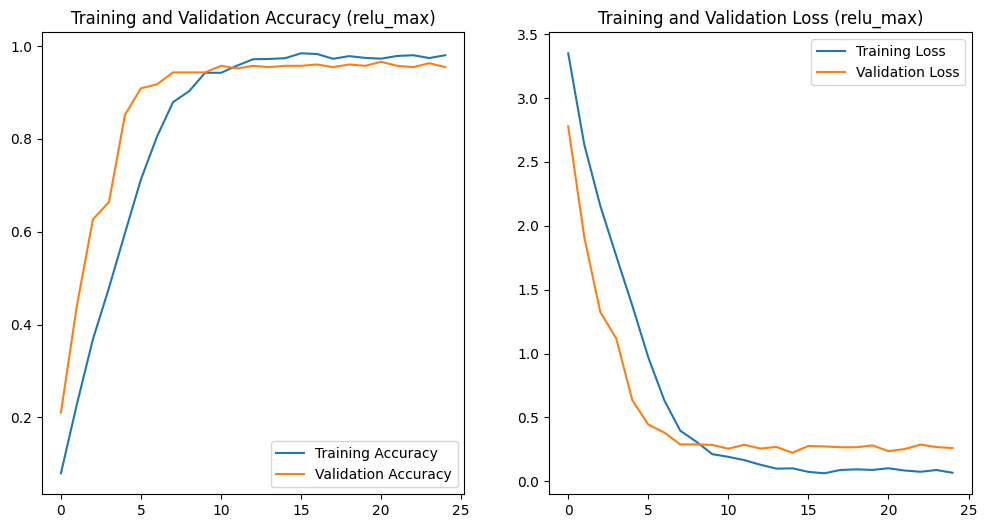

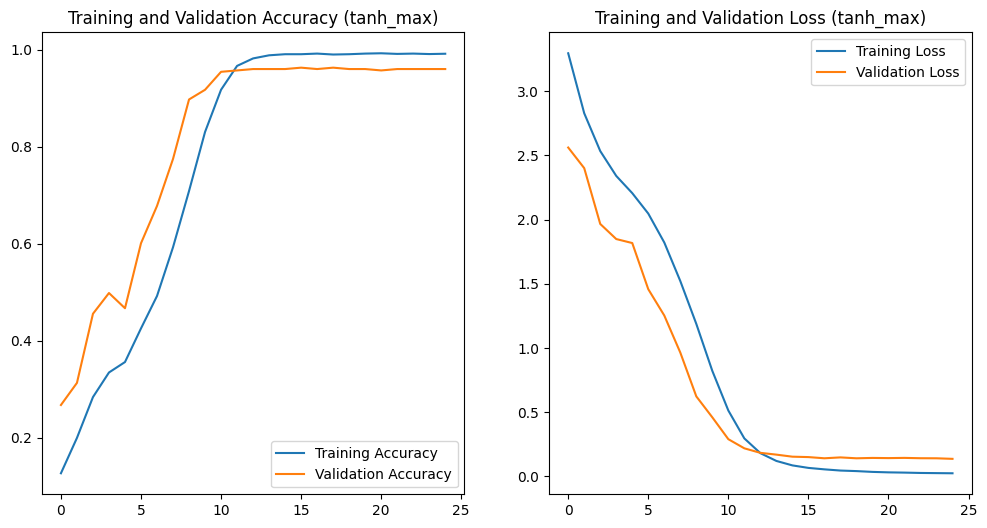

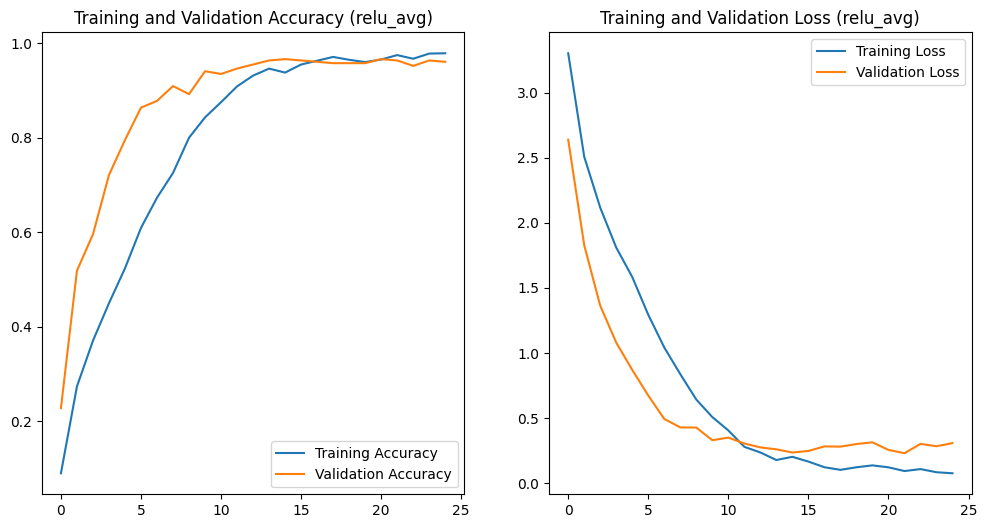

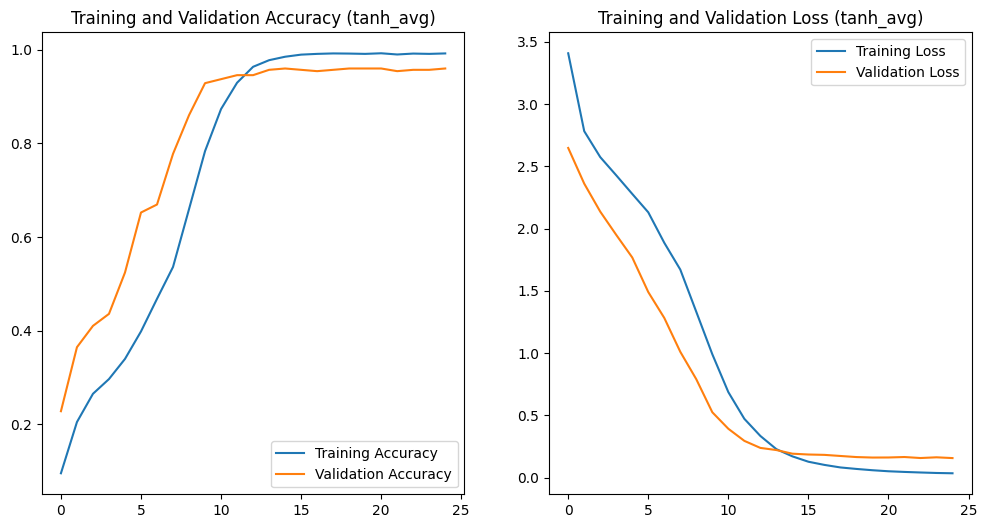

In [42]:

# Visualizing the results
def plot_results(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy ({title})')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss ({title})')
    plt.show()

for config_name, history in results.items():
    plot_results(history, config_name)

In [43]:
# Evaluate the best-performing model on test data
best_model_config = 'relu_max'  # Replace with the best config based on your experiments
best_model = build_model('relu', 'max')
best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
best_model.evaluate(test_dataset, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.0199 - loss: 3.6024 


[3.5910940170288086, 0.022284122183918953]